<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Regression Models

In [183]:
#importing the libraries
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

## Challenge 1

In [184]:
# Question
# ---
# Predict whether a customer buy life insurance or not.
# ---
# Dataset url = http://bit.ly/MSInsuranceDataset
# Attributes - 
# 1. age: age of a person 
# 2. insurance: bought insurance. 
# O indicates "No", 1 indicates "Yes"
# ---
# 
insurance=pd.read_csv('http://bit.ly/MSInsuranceDataset')
insurance

age  bought_insurance
0    22                 0
1    25                 0
2    47                 1
3    52                 0
4    46                 1
5    56                 1
6    55                 0
7    60                 1
8    62                 1
9    61                 1
10   18                 0
11   28                 0
12   27                 0
13   29                 0
14   49                 1
15   55                 1
16   25                 1
17   58                 1
18   19                 0
19   18                 0
20   21                 0
21   26                 0
22   40                 1
23   45                 1
24   50                 1
25   54                 1
26   23                 0

In [185]:
print("[INFO] keys : {}".format(insurance.keys()))

[INFO] keys : Index(['age', 'bought_insurance'], dtype='object')


In [186]:

dataset=insurance
print("[INFO] features shape : {}".format(dataset.shape))
print("[INFO] target shape   : {}".format(dataset.shape))


[INFO] features shape : (27, 2)
[INFO] target shape   : (27, 2)


column names are accessed using feature_names on the dataset which returns the unique attribute names.  column names are used when converting this dataset to a pandas dataframe

In [187]:
print("[INFO] feature names")
print(insurance.columns)

[INFO] feature names
Index(['age', 'bought_insurance'], dtype='object')


here are twonkeys in this dataset to access more information about the dataset. age, bought_insurance,  keys which could be accessed using keys() on the dataset variable.

In [188]:
print("[INFO] Data types")
print(insurance.dtypes)


[INFO] Data types
age                 int64
bought_insurance    int64
dtype: object


In [189]:
#statistical description of the dataset
print(insurance.describe())


        age  bought_insurance
count 27.00             27.00
mean  39.67              0.52
std   15.75              0.51
min   18.00              0.00
25%   25.00              0.00
50%   45.00              1.00
75%   54.50              1.00
max   62.00              1.00


Correlation
Finding correlation between attributes is a highly useful way to check for patterns in the dataset. Pandas offers three different ways to find correlation between attributes (columns). The output of each of these correlation functions fall within the range [-1, 1].

1 - Positively correlated
-1 - Negatively correlated.
0 - Not correlated.
To learn more about correlation, please read this wikipedia article. We will use df.corr() function to compute the correlation between attributes and sns.heatmap() function to visualize the correlation matrix.

PEARSON CORRELATION
                  age  bought_insurance
age              1.00              0.73
bought_insurance 0.73              1.00
SPEARMAN CORRELATION
                  age  bought_insurance
age              1.00              0.68
bought_insurance 0.68              1.00
KENDALL CORRELATION
                  age  bought_insurance
age              1.00              0.56
bought_insurance 0.56              1.00


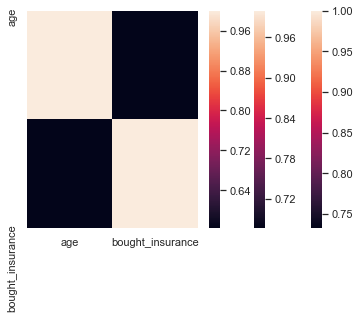

In [190]:
import seaborn as sns
# correlation between attributes
print("PEARSON CORRELATION")
print(insurance.corr(method="pearson"))
sns.heatmap(insurance.corr(method="pearson"))


print("SPEARMAN CORRELATION")
print(insurance.corr(method="spearman"))
sns.heatmap(insurance.corr(method="spearman"))


print("KENDALL CORRELATION")
print(insurance.corr(method="kendall"))
sns.heatmap(insurance.corr(method="kendall"))

Missing Values
Sometimes, in a dataset we will have missing values such as NaN or empty string in a cell. We need to take care of these missing values so that our machine learning model doesn’t break. To handle missing values, there are three approaches followed.

Replace the missing value with a large negative number (e.g. -999).
Replace the missing value with mean of the column.
Replace the missing value with median of the column.
To find if a column in our dataset has missing values, you can use pd.isnull(df).any() which returns a boolean for each column in the dataset that tells if the column contains any missing value. In this dataset, there are no missing values!

In [191]:
#checkinh missing values
print(insurance.isnull().any())

age                 False
bought_insurance    False
dtype: bool


In [192]:
file_report = "insurance.txt"
with open(file_report, "w") as f:
    f.write("Features shape : {}".format(insurance.drop("bought_insurance", axis=1).shape))
    f.write("\n")

    f.write("Target shape   : {}".format(insurance["bought_insurance"].shape))
    f.write("\n")

    f.write("\nColumn names")
    f.write("\n")
    f.write(str(insurance.columns))
    f.write("\n")

    f.write("\nStatistical summary")
    f.write("\n")
    f.write(str(insurance.describe()))
    f.write("\n")

    f.write("\nDatatypes")
    f.write("\n")
    f.write(str(insurance.dtypes))
    f.write("\n")

    f.write("\nPEARSON correlation")
    f.write("\n")
    f.write(str(insurance.corr(method="pearson")))
    f.write("\n")

    f.write("\nSPEARMAN correlation")
    f.write("\n")
    f.write(str(insurance.corr(method="spearman")))
    f.write("\n")

    f.write("\nKENDALL correlation")
    f.write("\n")
    f.write(str(insurance.corr(method="kendall")))
   
   #f.write("\nMissing Values")
   #f.write("\n")
   #f.write(str(insurance.isnull(insurance))
   

# Visualize the dataset
 two types of visualization strategy namely univariate plots and bivariate plots. univariate plot is used to visualize a single column or an attribute whereas bivariate plot is used to visualize two columns or two attributes.

# A box-whisker plot 

is a univariate plot used to visualize a data distribution.

The ends of whiskers are the maximum and minimum range of data distribution.
The central line in the box is the median of the entire data distribution.
The right and left edges in the box are the medians of data distribution to the right and left from the central median, respectively.

In [193]:
## BOXPLOT
# visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

sns.set(color_codes=True)
colors = ["y", "b", "g", "r"]

cols = list(insurance.columns.values)

if not os.path.exists("plots/univariate/box"):
    os.makedirs("plots/univariate/box")

# draw a boxplot with vertical orientation
for i, col in enumerate(cols):
    sns.boxplot(insurance[col], color=random.choice(colors), orient="v")
    plt.savefig("plots/univariate/box/box_" + str(i) + ".png")
    plt.clf()
    plt.close()

# Density plot
Density plot is another univariate plot that draws a histogram of the data distribution and fits a Kernel Density Estimate (KDE).

A histogram is a graphical representation of a frequency distribution where data points are organized as bins, plotted with values along the x-axis and the count of data points in each bin along the y-axis.

A Kernel Density Plot shows a smooth representation of the data points.

In [194]:
#DISTPLOT
if not os.path.exists("plots/univariate/density"):
    os.makedirs("plots/univariate/density")

# draw a histogram and fit a kernel density estimate (KDE)
for i, col in enumerate(cols):
    sns.distplot(insurance[col], color=random.choice(colors))
    plt.savefig("plots/univariate/density/density_" + str(i) + ".png")
    plt.clf()
    plt.close()

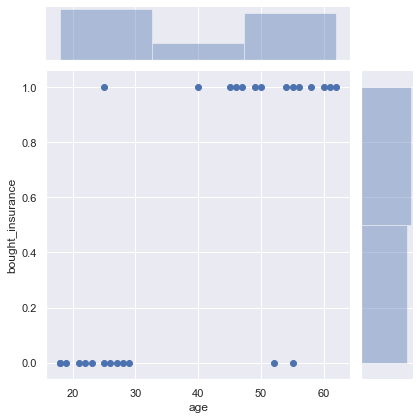

In [195]:
# JOINTPLOT
if not os.path.exists("plots/multivariate"):
    os.makedirs("plots/multivariate")

# bivariate plot between target and reason of absence
for i, col in enumerate(cols):
    if (i == len(cols) - 1):
        pass
    else: 
        sns.jointplot(x=col, y="bought_insurance", data=insurance)
        plt.show()
        plt.savefig("plots/multivariate/target_vs_" + str(i) + ".png")
        plt.clf()
        plt.close()
        

From the density plots, we can see that bought_insurance has bimodal distribution. 
other dist:
* exponential
* skewed gaussian distribution
* bimodal distribution.

# Scatter plot
Scatter plot is used to understand relationship between two different attributes in the dataset. Below we have compared bought_insurance (target) vs each of the attribute in the dataset.

# Pairplot
For each pair of features (columns) in the dataset, we can visualize the scatter plot for each pair along with the feature’s histogram along the diagonal in a single image using sns.pairplot() function.

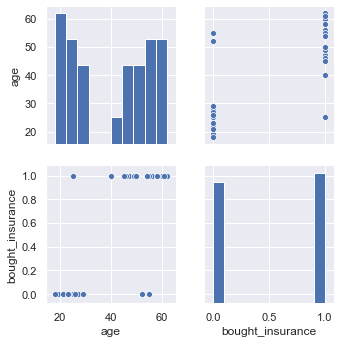

In [196]:
# pairplot
sns.pairplot(insurance)
plt.show()
plt.savefig("plots/pairplot.png")
plt.clf()
plt.close()

varying of structure in this dataset with outliers and different data distributions. Two key take aways from these visualizations are

* Data is not standardized (meaning there are different data distributions).
* Data is not normalized (meaning there are differing scales of data)

# Training regression models

can’t suggest the best regression model for this problem. So, we will try out different regression models available in scikit-learn with a 10-fold cross validation method.

It means we split the training data into train and test data using a test_size parameter for 10-folds. Each fold will have different samples that are not present in other folds. By this way, we can throughly train our model on different samples in the dataset.

Before doing anything, we will split our boston housing prices dataframe df into features X and target Y.

train.py

In [197]:
X = insurance.drop("bought_insurance", axis=1)
Y = insurance["bought_insurance"]
print(X.shape)
print(Y.shape)

(27, 1)
(27,)


different data distributions, we will standardize the dataset using StandardScaler function in scikit-learn. This is a useful technique where the attributes are transformed to a standard gaussian distribution with a mean of 0 and a standard deviation of 1.

In [198]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

split the data into train and test set. We can easily do this using scikit-learn’s train_test_split() function using a test_size parameter.

In [199]:
from sklearn.model_selection import train_test_split

seed      = 9
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21, 1)
(6, 1)
(21,)
(6,)


use different regression models offered by scikit-learn to produce a baseline accuracy for this problem. We will use the MSE (Mean Squared Error) as the performance metric for the regression models.

In [200]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# user variables to tune
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

Linear: -0.12, 0.142
Lasso: -0.278, 0.062
ElasticNet: -0.278, 0.062
KNN: -0.112, 0.162
DecisionTree: -0.283, 0.325
SVR: -0.099, 0.152


C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

AdaBoost: -0.283, 0.325
GradientBoost: -0.283, 0.325
RandomForest: -0.173, 0.193


C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

ExtraTrees: -0.288, 0.323


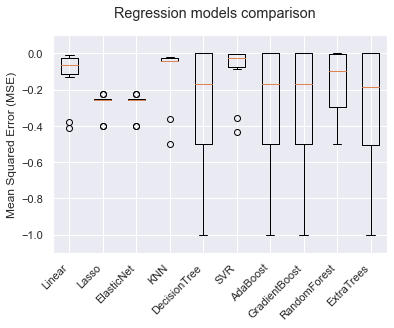

In [201]:
# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.show()
plt.savefig("model_mse_scores.png")
plt.clf()
plt.close()

 # Choosing the best model

Linear model outperforms all the other regression models.Hence it is the best regression model 

In [202]:
# create and fit the best regression model
best_model = GradientBoostingRegressor(random_state=seed)
#best_model = LinearRegression()
#best_model = KNeighborsRegressor()
best_model.fit(X_train, Y_train)

# make predictions using the model
predictions = best_model.predict(X_test)
print("[INFO] MSE : {}".format(round(mean_squared_error(Y_test, predictions), 3)))


[INFO] MSE : 0.5


 **visualize the predictions made by our best model and the original targets Y_test**

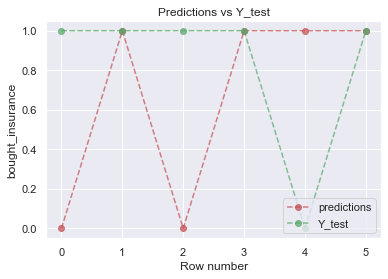

In [203]:
# plot between predictions and Y_test
import numpy as np
x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, predictions, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('bought_insurance')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')
plt.show()
plt.savefig("predictions_vs_ytest.png")
plt.clf()
plt.close()

# Model Performance Improvement:Parameter tuning 





Tune different regression models used in this example using scikit-learn’s GridSearchCV() function. By tuning, we mean trying out different hyper-parameters for each model. You can check this post to perform hyperparameter tuning.

understand feature importance (or variable importance) of the dataset which tells us how important each feature is, to predict the target.

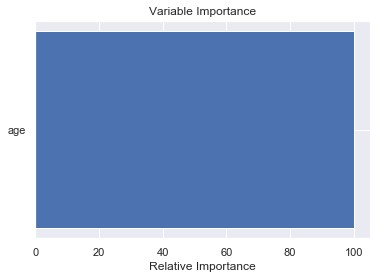

In [204]:
# plot model's feature importance
feature_importance = best_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, insurance.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
plt.savefig("feature_importance.png")
plt.clf()
plt.close()

https://gogul.dev/software/regression-example-boston-housing-prices

## Challenge 2

In [205]:
# Question
# ---
# Build a model to predict the presence of a heart disease in a patient.
# ---
# Dataset url = http://bit.ly/HeartDiseaseDataset
# ---
# Dataset info = http://bit.ly/HeartDiseaseDatasetInfo
# 
disease=pd.read_csv('http://bit.ly/HeartDiseaseDataset')
disease

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0     2.30   
1     37    1   2       130   250    0        1      187      0     3.50   
2     41    0   1       130   204    0        0      172      0     1.40   
3     56    1   1       120   236    0        1      178      0     0.80   
4     57    0   0       120   354    0        1      163      1     0.60   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1     0.20   
299   45    1   3       110   264    0        1      132      0     1.20   
300   68    1   0       144   193    1        1      141      0     3.40   
301   57    1   0       130   131    0        1      115      1     1.20   
302   57    0   1       130   236    0        0      174      0     0.00   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [206]:
print("[INFO] keys : {}".format(disease.keys()))

[INFO] keys : Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [207]:
print("[INFO] features shape : {}".format(disease.shape))


[INFO] features shape : (303, 14)


In [208]:
print("[INFO] feature names")
print(disease.columns)

[INFO] feature names
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [209]:
print("[INFO] Data types")
print(disease.dtypes)

[INFO] Data types
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [210]:
#statistical description of the dataset
print(disease.describe())

         age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
count 303.00 303.00 303.00    303.00 303.00 303.00   303.00   303.00 303.00   
mean   54.37   0.68   0.97    131.62 246.26   0.15     0.53   149.65   0.33   
std     9.08   0.47   1.03     17.54  51.83   0.36     0.53    22.91   0.47   
min    29.00   0.00   0.00     94.00 126.00   0.00     0.00    71.00   0.00   
25%    47.50   0.00   0.00    120.00 211.00   0.00     0.00   133.50   0.00   
50%    55.00   1.00   1.00    130.00 240.00   0.00     1.00   153.00   0.00   
75%    61.00   1.00   2.00    140.00 274.50   0.00     1.00   166.00   1.00   
max    77.00   1.00   3.00    200.00 564.00   1.00     2.00   202.00   1.00   

       oldpeak  slope     ca   thal  target  
count   303.00 303.00 303.00 303.00  303.00  
mean      1.04   1.40   0.73   2.31    0.54  
std       1.16   0.62   1.02   0.61    0.50  
min       0.00   0.00   0.00   0.00    0.00  
25%       0.00   1.00   0.00   2.00    0.00  
50%       0.

In [211]:
import seaborn as sns
# correlation between attributes
print("PEARSON CORRELATION")
print(disease.corr(method="pearson"))
sns.heatmap(disease.corr(method="pearson"))
plt.savefig("heatmap_pearson.png")
plt.clf()
plt.close()

print("SPEARMAN CORRELATION")
print(disease.corr(method="spearman"))
sns.heatmap(disease.corr(method="spearman"))
plt.savefig("heatmap_pearson.png")
plt.clf()
plt.close()

print("KENDALL CORRELATION")
print(disease.corr(method="kendall"))
sns.heatmap(disease.corr(method="kendall"))
plt.savefig("heatmap_pearson.png")
plt.clf()
plt.close()

PEARSON CORRELATION
           age   sex    cp  trestbps  chol   fbs  restecg  thalach  exang  \
age       1.00 -0.10 -0.07      0.28  0.21  0.12    -0.12    -0.40   0.10   
sex      -0.10  1.00 -0.05     -0.06 -0.20  0.05    -0.06    -0.04   0.14   
cp       -0.07 -0.05  1.00      0.05 -0.08  0.09     0.04     0.30  -0.39   
trestbps  0.28 -0.06  0.05      1.00  0.12  0.18    -0.11    -0.05   0.07   
chol      0.21 -0.20 -0.08      0.12  1.00  0.01    -0.15    -0.01   0.07   
fbs       0.12  0.05  0.09      0.18  0.01  1.00    -0.08    -0.01   0.03   
restecg  -0.12 -0.06  0.04     -0.11 -0.15 -0.08     1.00     0.04  -0.07   
thalach  -0.40 -0.04  0.30     -0.05 -0.01 -0.01     0.04     1.00  -0.38   
exang     0.10  0.14 -0.39      0.07  0.07  0.03    -0.07    -0.38   1.00   
oldpeak   0.21  0.10 -0.15      0.19  0.05  0.01    -0.06    -0.34   0.29   
slope    -0.17 -0.03  0.12     -0.12 -0.00 -0.06     0.09     0.39  -0.26   
ca        0.28  0.12 -0.18      0.10  0.07  0.14    -0.0

In [212]:
#checkinh missing values
print(disease.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [213]:
file_report = "disease.txt"
with open(file_report, "w") as f:
    f.write("Features shape : {}".format(disease.drop("target", axis=1).shape))
    f.write("\n")

    f.write("Target shape   : {}".format(disease["target"].shape))
    f.write("\n")

    f.write("\nColumn names")
    f.write("\n")
    f.write(str(disease.columns))
    f.write("\n")

    f.write("\nStatistical summary")
    f.write("\n")
    f.write(str(disease.describe()))
    f.write("\n")

    f.write("\nDatatypes")
    f.write("\n")
    f.write(str(disease.dtypes))
    f.write("\n")

    f.write("\nPEARSON correlation")
    f.write("\n")
    f.write(str(disease.corr(method="pearson")))
    f.write("\n")

    f.write("\nSPEARMAN correlation")
    f.write("\n")
    f.write(str(disease.corr(method="spearman")))
    f.write("\n")

    f.write("\nKENDALL correlation")
    f.write("\n")
    f.write(str(disease.corr(method="kendall")))
   
   #f.write("\nMissing Values")
   #f.write("\n")
   #f.write(str(disease.isnull(insurance))

# VISUALIZATION

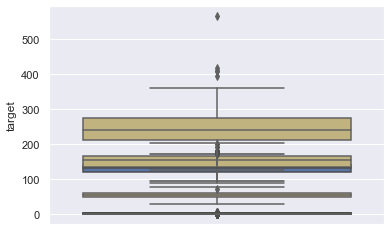

In [214]:
#BOXPLOT
# visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

sns.set(color_codes=True)
colors = ["y", "b", "g", "r"]

cols = list(disease.columns.values)

if not os.path.exists("plots/univariate/box"):
    os.makedirs("plots/univariate/box")

# draw a boxplot with vertical orientation
for i, col in enumerate(cols):
	sns.boxplot(disease[col], color=random.choice(colors), orient="v")

In [215]:
# saving the boxplot with vertical orientation
for i, col in enumerate(cols):	
    plt.savefig("plots/univariate/box/box_" + str(i) + ".png")
    plt.clf()
    plt.close()

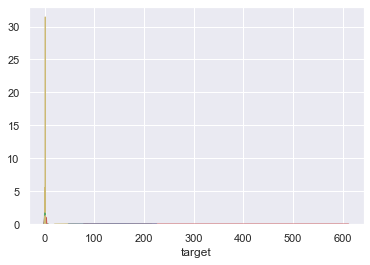

In [216]:
#DISTPLOT
if not os.path.exists("plots/univariate/density"):
    os.makedirs("plots/univariate/density")

# draw a histogram and fit a kernel density estimate (KDE)
for i, col in enumerate(cols):
    sns.distplot(disease[col], color=random.choice(colors))

In [217]:
# draw a histogram and fit a kernel density estimate (KDE)
for i, col in enumerate(cols):	
    plt.savefig("plots/univariate/density/density_" + str(i) + ".png")
    plt.clf()
    plt.close()

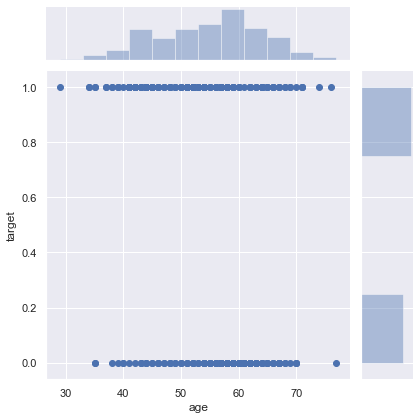

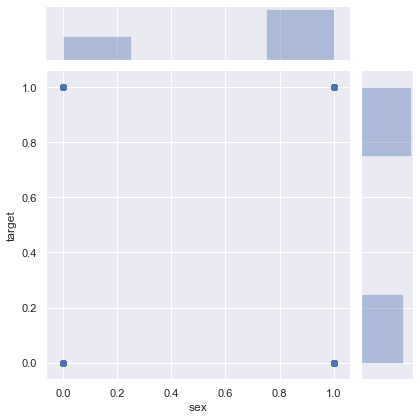

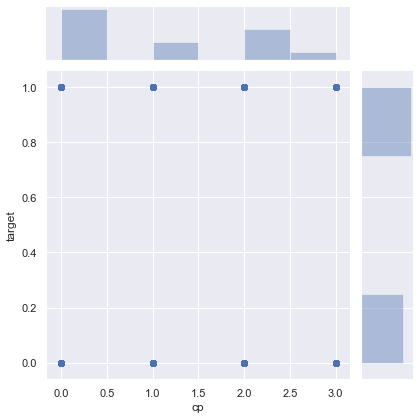

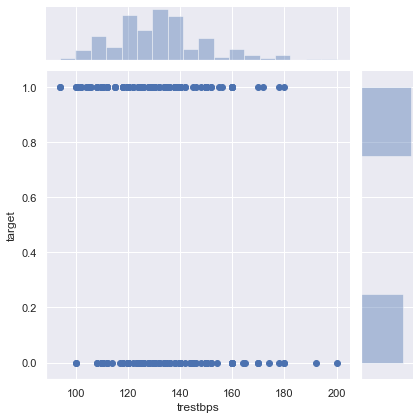

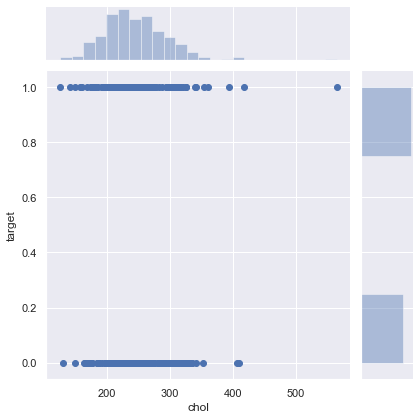

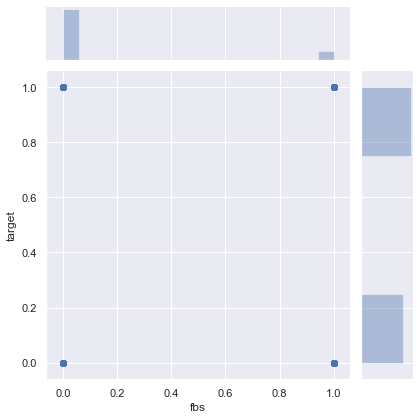

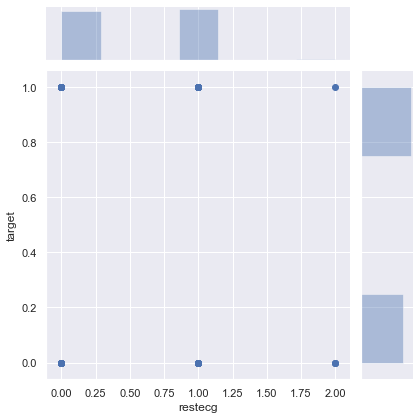

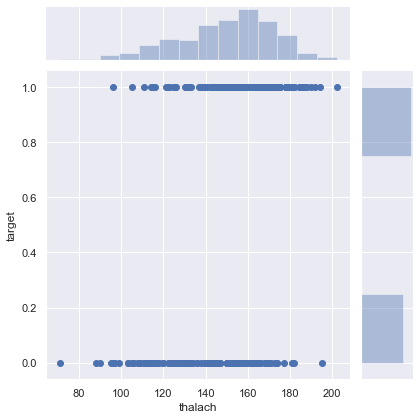

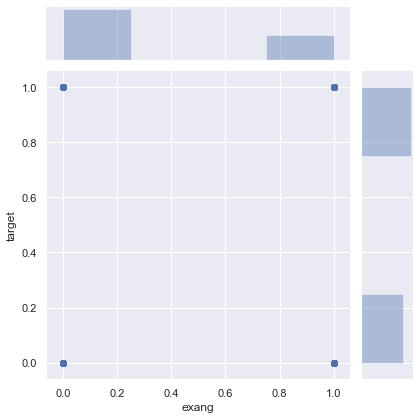

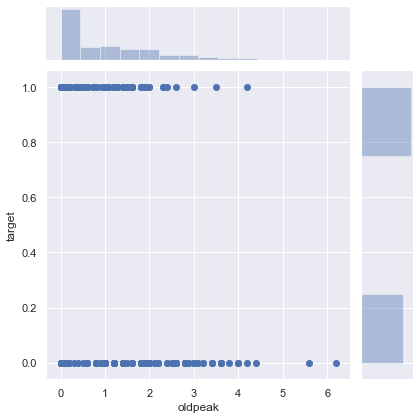

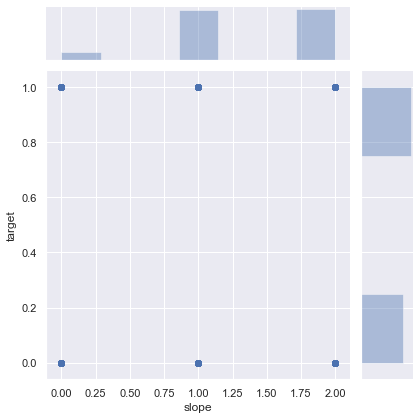

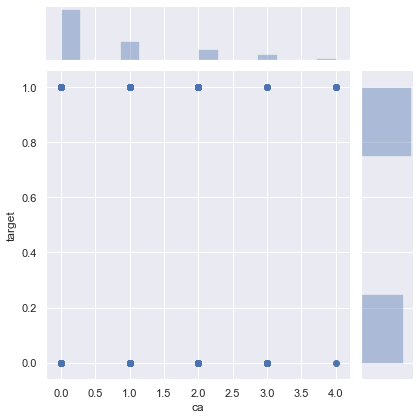

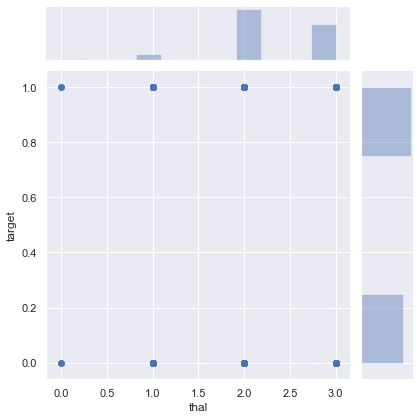

In [218]:
# JOINTPLOT
if not os.path.exists("plots/multivariate"):
    os.makedirs("plots/multivariate")

# bivariate plot between target and reason of absence
for i, col in enumerate(cols):
    if (i == len(cols) - 1):
    pass
    else: 
        sns.jointplot(x=col, y="target", data=disease)

In [219]:
#saving the dist plot
for i, col in enumerate(cols):
    if (i == len(cols) - 1):
        pass
    else: 
        plt.savefig("plots/multivariate/target_vs_" + str(i) + ".png")
        plt.clf()
        plt.close()

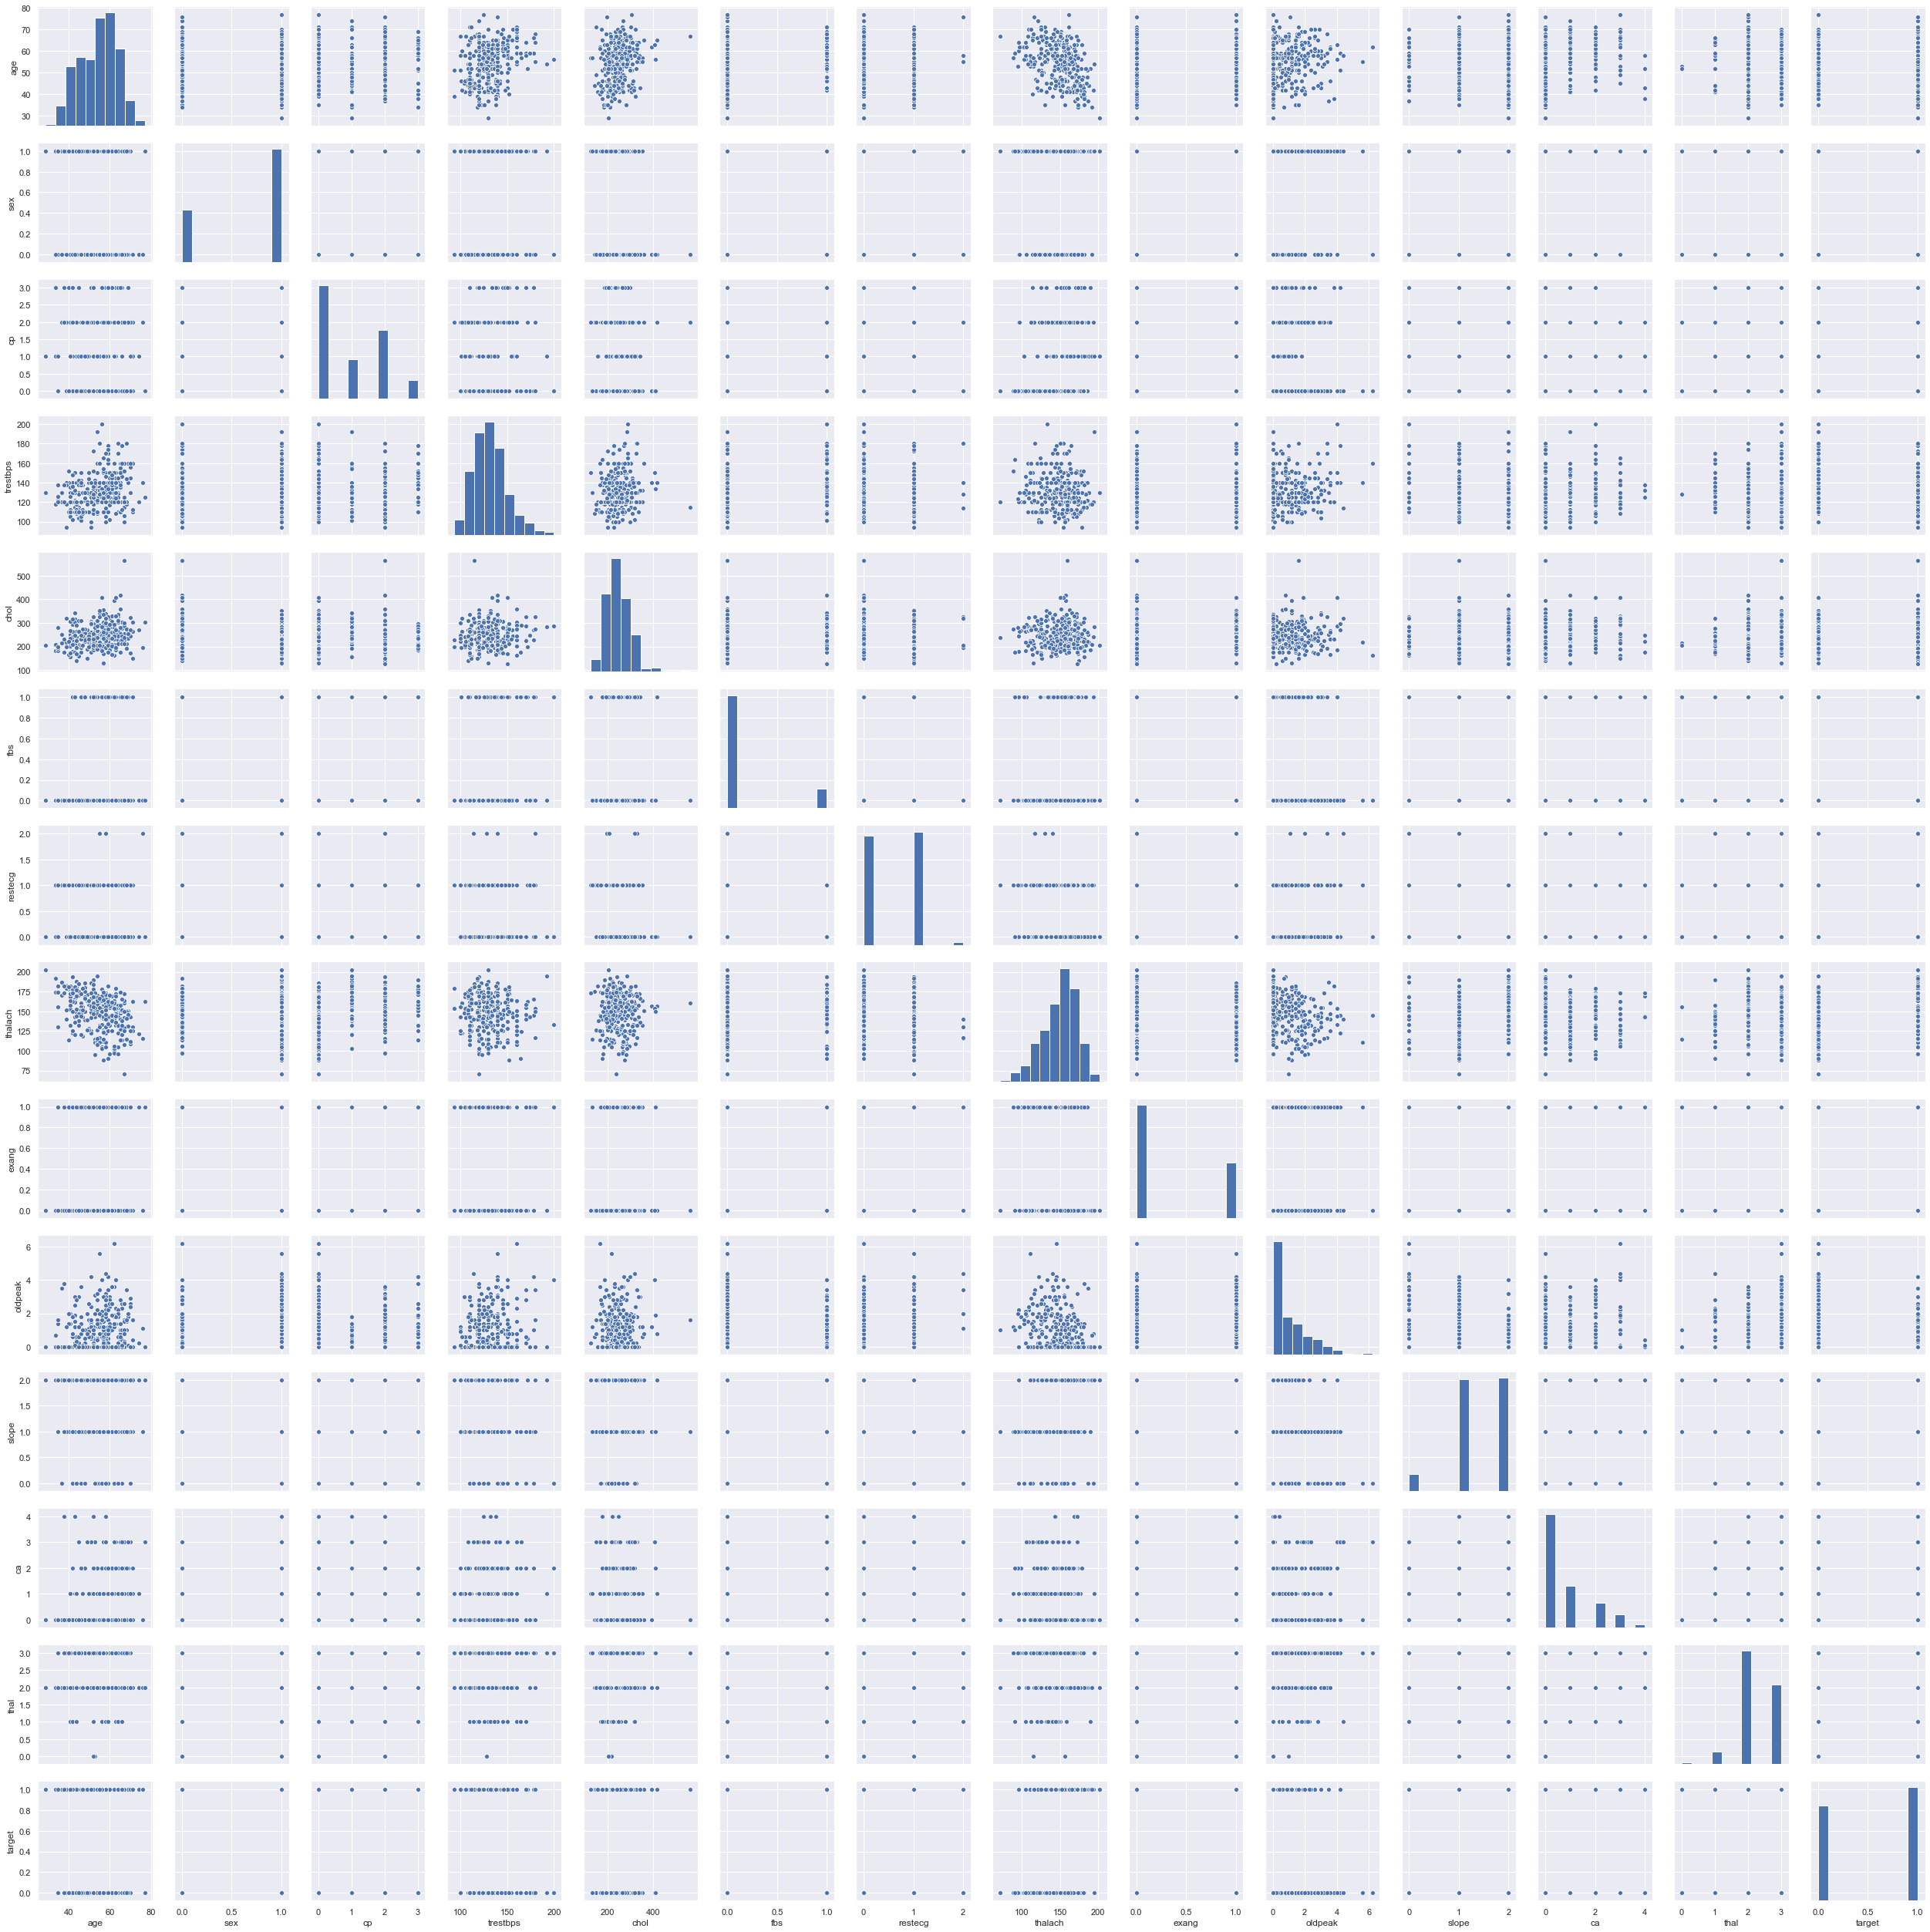

In [220]:
# PAIRPLOT
sns.pairplot(disease)
plt.show()
plt.savefig("plots/pairplot.png")
plt.clf()
plt.close()

## MODEL 2

In [221]:
#SPLITTING DATA
X = disease.drop("target", axis=1)
Y = disease["target"]
print(X.shape)
print(Y.shape)

(303, 13)
(303,)


In [222]:
#SCALING DATA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

In [223]:
#TRAINING AND VALIDATION DATA
from sklearn.model_selection import train_test_split
seed      = 9
test_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [224]:
#SELECTING MODELS
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
# user variables to tune
folds   = 10
metric  = "neg_mean_squared_error"
# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

In [225]:
#TRAINING MODELS
# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))


Linear: -0.136, 0.036
Lasso: -0.251, 0.003
ElasticNet: -0.251, 0.003
KNN: -0.145, 0.045
DecisionTree: -0.281, 0.107
SVR: -0.137, 0.035


C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

AdaBoost: -0.164, 0.019
GradientBoost: -0.139, 0.042
RandomForest: -0.165, 0.051


C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

ExtraTrees: -0.144, 0.06


C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

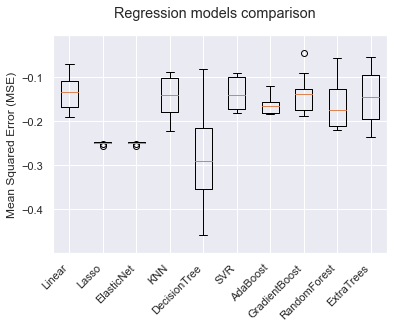

In [226]:
#VISUALIZING THE RESULTS
# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.show()
plt.savefig("model_mse_scores.png")
plt.clf()
plt.close()

In [227]:
# create and fit the best regression model
best_model = GradientBoostingRegressor(random_state=seed)
#best_model = LinearRegression()
#best_model = KNeighborsRegressor()
best_model.fit(X_train, Y_train)

# make predictions using the model
predictions = best_model.predict(X_test)
print("[INFO] MSE : {}".format(round(mean_squared_error(Y_test, predictions), 3)))

[INFO] MSE : 0.144


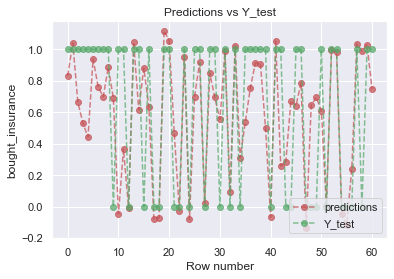

In [228]:
# plot between predictions and Y_test
import numpy as np
x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, predictions, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('bought_insurance')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')
plt.show()
plt.savefig("predictions_vs_ytest.png")
plt.clf()
plt.close()

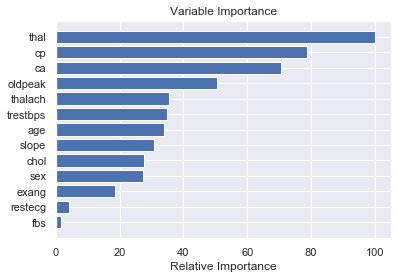

In [229]:
# plot model's feature importance
feature_importance = best_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, disease.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
plt.savefig("feature_importance.png")
plt.clf()
plt.close()

## Challenge 3

In [230]:
# Question
# ---
# Create a model to accurately predict insurance costs.
# ---
# Dataset url = http://bit.ly/InsuranceDataset2
# ---
# 
cost=pd.read_csv('http://bit.ly/InsuranceDataset2')
cost

age     sex   bmi  children smoker     region   charges
0      19  female 27.90         0    yes  southwest 16,884.92
1      18    male 33.77         1     no  southeast  1,725.55
2      28    male 33.00         3     no  southeast  4,449.46
3      33    male 22.70         0     no  northwest 21,984.47
4      32    male 28.88         0     no  northwest  3,866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male 30.97         3     no  northwest 10,600.55
1334   18  female 31.92         0     no  northeast  2,205.98
1335   18  female 36.85         0     no  southeast  1,629.83
1336   21  female 25.80         0     no  southwest  2,007.94
1337   61  female 29.07         0    yes  northwest 29,141.36

[1338 rows x 7 columns]

In [231]:
#column names
cost.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [232]:
'sex',  'smoker', 'region'

('sex', 'smoker', 'region')

In [233]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
# Categorical boolean mask
categorical_feature_mask = cost.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_features = cost.columns[categorical_feature_mask].tolist()
categorical_features

['sex', 'smoker', 'region']

In [234]:
#initializing the label encoder
le = LabelEncoder()
# Converting the variables to numerical
for i in range(3):
    new = le.fit_transform(cost[categorical_features[i]])
    cost[categorical_features[i]] = new
cost.head()

age  sex   bmi  children  smoker  region   charges
0   19    0 27.90         0       1       3 16,884.92
1   18    1 33.77         1       0       2  1,725.55
2   28    1 33.00         3       0       2  4,449.46
3   33    1 22.70         0       0       1 21,984.47
4   32    1 28.88         0       0       1  3,866.86

In [235]:
import seaborn as sns
# correlation between attributes
print("PEARSON CORRELATION")
print(cost.corr(method="pearson"))
sns.heatmap(cost.corr(method="pearson"))
plt.savefig("heatmap_pearson_cost.png")
plt.clf()
plt.close()

print("SPEARMAN CORRELATION")
print(cost.corr(method="spearman"))
sns.heatmap(cost.corr(method="spearman"))
plt.savefig("heatmap_pearson_cost.png")
plt.clf()
plt.close()

print("KENDALL CORRELATION")
print(cost.corr(method="kendall"))
sns.heatmap(cost.corr(method="kendall"))
plt.savefig("heatmap_pearson_cost.png")
plt.clf()
plt.close()

PEARSON CORRELATION
           age   sex  bmi  children  smoker  region  charges
age       1.00 -0.02 0.11      0.04   -0.03    0.00     0.30
sex      -0.02  1.00 0.05      0.02    0.08    0.00     0.06
bmi       0.11  0.05 1.00      0.01    0.00    0.16     0.20
children  0.04  0.02 0.01      1.00    0.01    0.02     0.07
smoker   -0.03  0.08 0.00      0.01    1.00   -0.00     0.79
region    0.00  0.00 0.16      0.02   -0.00    1.00    -0.01
charges   0.30  0.06 0.20      0.07    0.79   -0.01     1.00
SPEARMAN CORRELATION
           age   sex  bmi  children  smoker  region  charges
age       1.00 -0.02 0.11      0.06   -0.03    0.00     0.53
sex      -0.02  1.00 0.04      0.02    0.08    0.00     0.01
bmi       0.11  0.04 1.00      0.02    0.00    0.15     0.12
children  0.06  0.02 0.02      1.00    0.02    0.01     0.13
smoker   -0.03  0.08 0.00      0.02    1.00   -0.00     0.66
region    0.00  0.00 0.15      0.01   -0.00    1.00    -0.04
charges   0.53  0.01 0.12      0.13    0.66 

In [236]:
#checkinh missing values
print(disease.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [237]:
file_report = "cost.txt"
with open(file_report, "w") as f:
    f.write("Features shape : {}".format(cost.drop("charges", axis=1).shape))
    f.write("\n")

    f.write("Target shape   : {}".format(cost["charges"].shape))
    f.write("\n")

    f.write("\nColumn names")
    f.write("\n")
    f.write(str(cost.columns))
    f.write("\n")

    f.write("\nStatistical summary")
    f.write("\n")
    f.write(str(cost.describe()))
    f.write("\n")

    f.write("\nDatatypes")
    f.write("\n")
    f.write(str(cost.dtypes))
    f.write("\n")

    f.write("\nPEARSON correlation")
    f.write("\n")
    f.write(str(cost.corr(method="pearson")))
    f.write("\n")

    f.write("\nSPEARMAN correlation")
    f.write("\n")
    f.write(str(cost.corr(method="spearman")))
    f.write("\n")

    f.write("\nKENDALL correlation")
    f.write("\n")
    f.write(str(cost.corr(method="kendall")))
   
   #f.write("\nMissing Values")
   #f.write("\n")
   #f.write(str(disease.isnull(insurance))

# VISUALIZATION

In [238]:
#BOXPLOT
# visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

sns.set(color_codes=True)
colors = ["y", "b", "g", "r"]

cols = list(cost.columns.values)

if not os.path.exists("plots/univariate/box"):
    os.makedirs("plots/univariate/box")

# draw a boxplot with vertical orientation
for i, col in enumerate(cols):
    sns.boxplot(cost[col], color=random.choice(colors), orient="v")
    plt.savefig("plots/univariate/box/box_" + str(i) + ".png")
    plt.clf()
    plt.close()

In [239]:
# saving the boxplot with vertical orientation
for i, col in enumerate(cols):
    sns.boxplot(cost[col], color=random.choice(colors), orient="v")
    plt.savefig("plots/univariate/box/box_" + str(i) + ".png")
    plt.clf()
    plt.close()

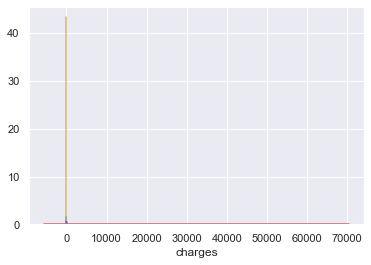

In [240]:
#DISTPLOT
if not os.path.exists("plots/univariate/density"):
    os.makedirs("plots/univariate/density")

# draw a histogram and fit a kernel density estimate (KDE)
for i, col in enumerate(cols):
	sns.distplot(cost[col], color=random.choice(colors))

In [241]:
# saving the histogram and fit a kernel density estimate (KDE)
for i, col in enumerate(cols):
    sns.distplot(cost[col], color=random.choice(colors))
    plt.savefig("plots/univariate/density/density_" + str(i) + ".png")
    plt.clf()
    plt.close()

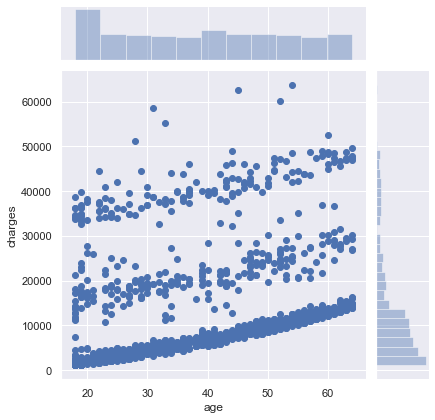

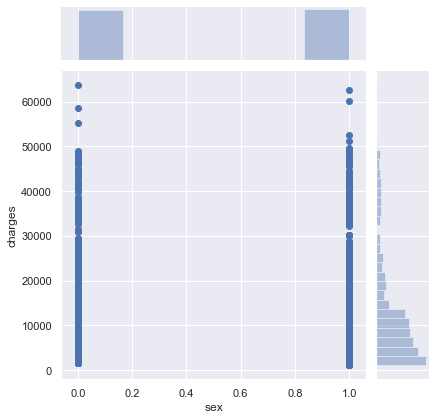

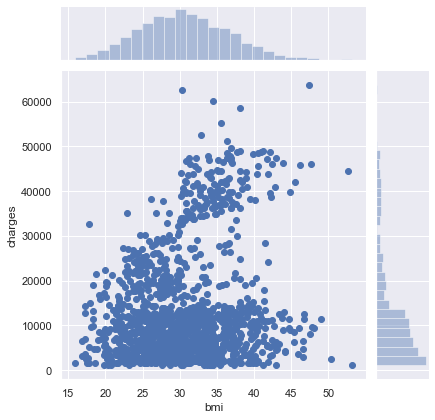

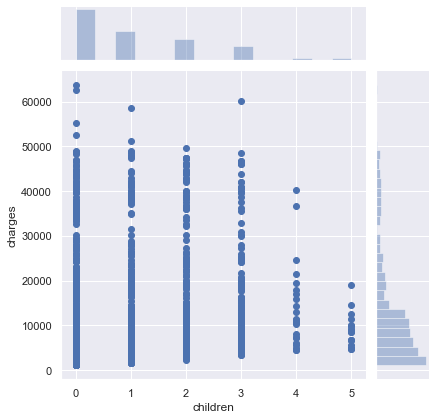

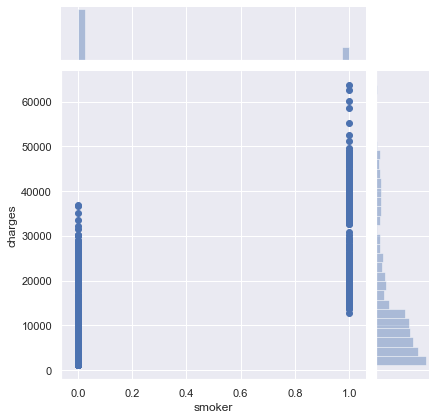

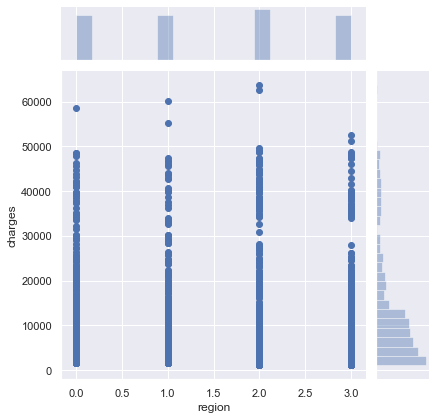

In [242]:
# JOINTPLOT
if not os.path.exists("plots/multivariate"):
    os.makedirs("plots/multivariate")

# bivariate plot between target and reason of absence
for i, col in enumerate(cols):
    if (i == len(cols) - 1):
        pass
    else: 
        sns.jointplot(x=col, y="charges", data=cost);

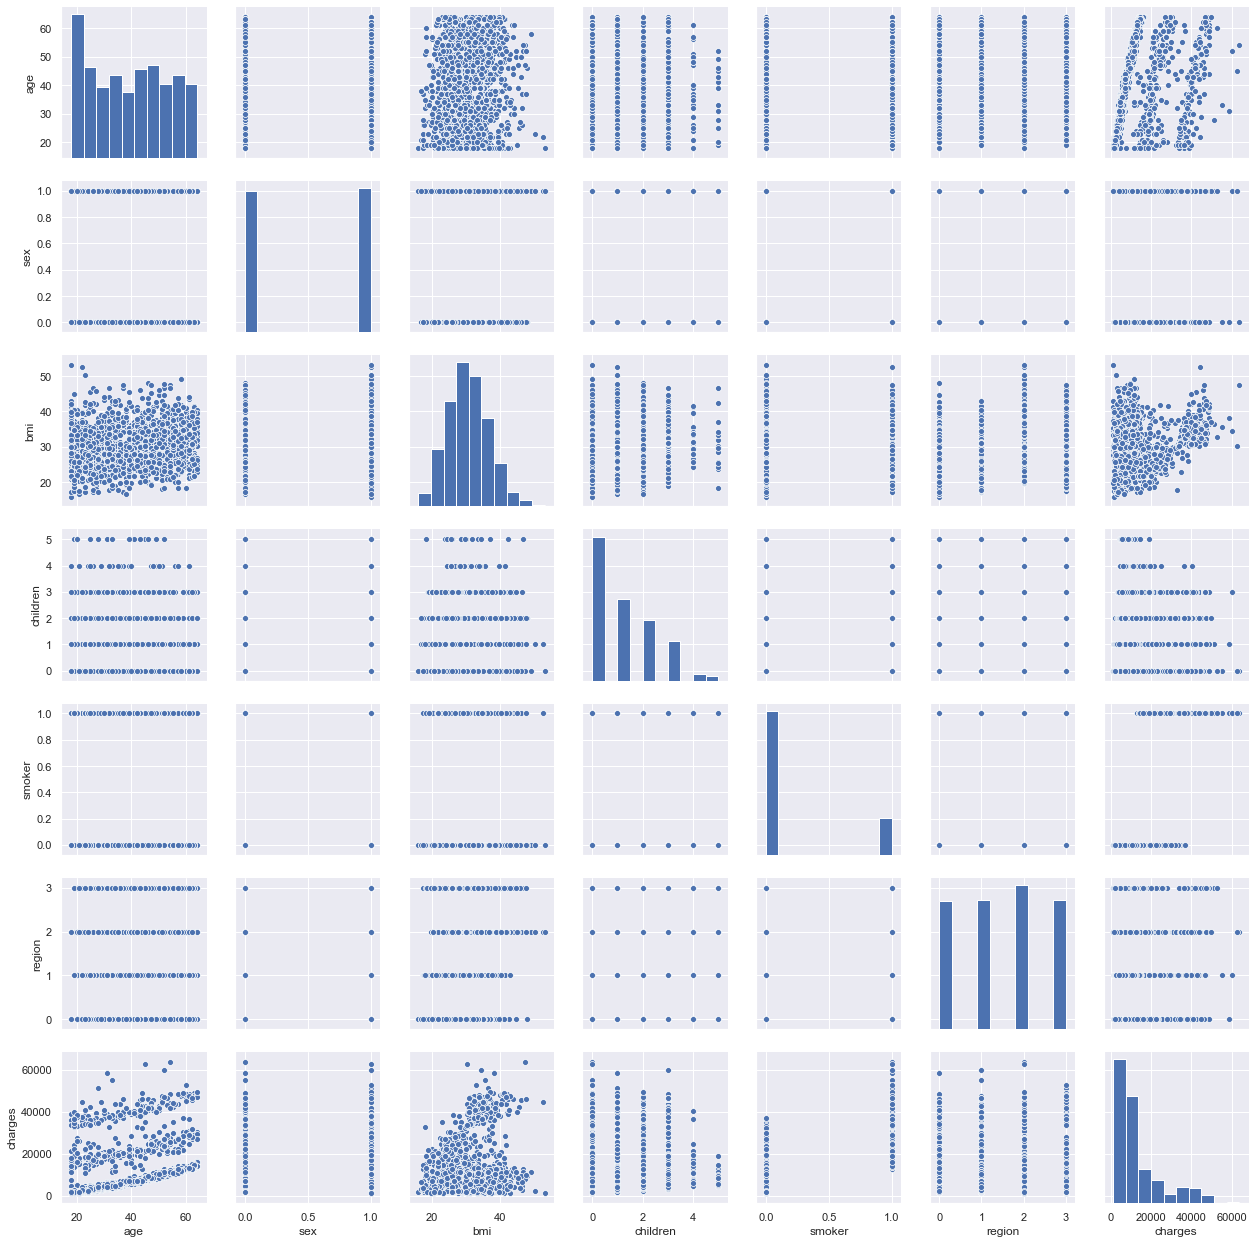

In [243]:
# PAIRPLOT
sns.pairplot(cost)
plt.show()
plt.savefig("plots/pairplot.png")
plt.clf()
plt.close()

## MODEL 3

In [244]:
#TRAING AND TARGET
X = cost.drop("charges", axis=1)
Y = cost["charges"]
print(X.shape)
print(Y.shape)

(1338, 6)
(1338,)


In [245]:
#SCALING DATA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

In [246]:
#SPLITTING TRANING AND TESTING DATA

from sklearn.model_selection import train_test_split

seed      = 9
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [247]:
#SELECTING MODELS
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# user variables to tune
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

In [248]:
#TRANINING MODELS
# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

Linear: -38447691.117, 7541504.123
Lasso: -38445504.766, 7542009.344
ElasticNet: -103698040.009, 14899111.661
KNN: -35413185.585, 8819455.208
DecisionTree: -51032775.552, 7059738.795


C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

SVR: -162358346.428, 26870595.929
AdaBoost: -26920774.86, 5867599.629
GradientBoost: -22123365.531, 7184874.893


C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

RandomForest: -28127194.058, 7097498.778


C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

ExtraTrees: -28673050.639, 6578401.27


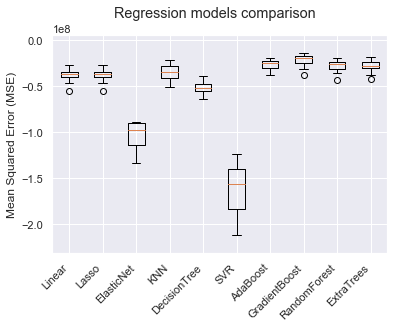

In [249]:
#VISUALIZING DATA
# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.show()
plt.savefig("cost_model_mse_scores.png")
plt.clf()
plt.close()

In [250]:
# create and fit the best regression model
best_model = GradientBoostingRegressor(random_state=seed)
#best_model = LinearRegression()
#best_model = KNeighborsRegressor()
best_model.fit(X_train, Y_train)

# make predictions using the model
predictions = best_model.predict(X_test)
print("[INFO] MSE : {}".format(round(mean_squared_error(Y_test, predictions), 3)))

[INFO] MSE : 18279188.683


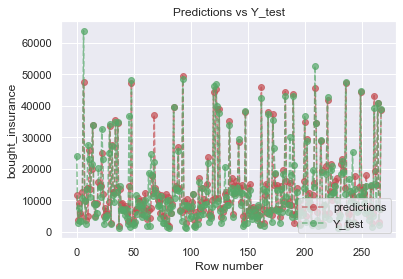

In [251]:
# plot between predictions and Y_test
import numpy as np
x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, predictions, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('bought_insurance')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')
plt.show()
plt.savefig("predictions_vs_ytest.png")
plt.clf()
plt.close()

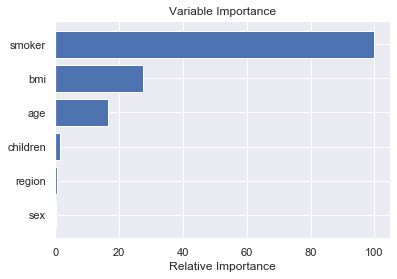

In [252]:
# plot model's feature importance
feature_importance = best_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, cost.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
plt.savefig("feature_importance.png")
plt.clf()
plt.close()

## Challenge 4

In [253]:
# Question
# ---
# Predict whether income exceeds $50K/yr based on the given dataset.
# ---
# Dataset url = http://bit.ly/AdultDataset
# ---
# 
income=pd.read_csv("http://bit.ly/AdultDataset")
income

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

In [254]:
#LABEL ENCODING
# Importing label encoder
from sklearn.preprocessing import LabelEncoder
# Categorical boolean mask
categorical_feature_mask = income.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_features = income.columns[categorical_feature_mask].tolist()
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [255]:
#initializing the label encoder
le = LabelEncoder()
# Converting the variables to numerical
for i in range(9):
    new = le.fit_transform(income[categorical_features[i]])
    income[categorical_features[i]] = new
income.head()

age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          4  226802          1                7               4   
1   38          4   89814         11                9               2   
2   28          2  336951          7               12               2   
3   44          4  160323         15               10               2   
4   18          0  103497         15               10               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           7             3     2       1             0             0   
1           5             0     4       1             0             0   
2          11             0     4       1             0             0   
3           7             0     2       1          7688             0   
4           0             3     4       0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              50              39       0  
2              40              39       1  
3              40              39       1  
4              30              39       0

In [256]:
import seaborn as sns
# correlation between attributes
print("PEARSON CORRELATION")
print(income.corr(method="pearson"))
sns.heatmap(income.corr(method="pearson"))
plt.savefig("heatmap_pearson_income.png")
plt.clf()
plt.close()

print("SPEARMAN CORRELATION")
print(income.corr(method="spearman"))
sns.heatmap(income.corr(method="spearman"))
plt.savefig("heatmap_pearson_income.png")
plt.clf()
plt.close()
print("KENDALL CORRELATION")
print(income.corr(method="kendall"))
sns.heatmap(income.corr(method="kendall"))
plt.savefig("heatmap_pearson_income.png")
plt.clf()
plt.close()

PEARSON CORRELATION
                  age  workclass  fnlwgt  education  educational-num  \
age              1.00       0.02   -0.08      -0.02             0.03   
workclass        0.02       1.00   -0.02       0.02             0.06   
fnlwgt          -0.08      -0.02    1.00      -0.02            -0.04   
education       -0.02       0.02   -0.02       1.00             0.36   
educational-num  0.03       0.06   -0.04       0.36             1.00   
marital-status  -0.26      -0.07    0.03      -0.04            -0.07   
occupation      -0.01       0.26    0.00      -0.02             0.11   
relationship    -0.26      -0.09    0.01      -0.01            -0.09   
race             0.03       0.05   -0.03       0.01             0.03   
gender           0.09       0.09    0.03      -0.03             0.01   
capital-gain     0.08       0.04   -0.00       0.03             0.13   
capital-loss     0.06       0.01   -0.00       0.02             0.08   
hours-per-week   0.07       0.14   -0.01    

In [257]:
#checkinh missing values
print(income.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [258]:
file_report = "income.txt"
with open(file_report, "w") as f:
    f.write("Features shape : {}".format(income.drop("income", axis=1).shape))
    f.write("\n")

    f.write("Target shape   : {}".format(income["income"].shape))
    f.write("\n")

    f.write("\nColumn names")
    f.write("\n")
    f.write(str(income.columns))
    f.write("\n")

    f.write("\nStatistical summary")
    f.write("\n")
    f.write(str(income.describe()))
    f.write("\n")

    f.write("\nDatatypes")
    f.write("\n")
    f.write(str(income.dtypes))
    f.write("\n")

    f.write("\nPEARSON correlation")
    f.write("\n")
    f.write(str(income.corr(method="pearson")))
    f.write("\n")

    f.write("\nSPEARMAN correlation")
    f.write("\n")
    f.write(str(income.corr(method="spearman")))
    f.write("\n")

    f.write("\nKENDALL correlation")
    f.write("\n")
    f.write(str(income.corr(method="kendall")))
   
   #f.write("\nMissing Values")
   #f.write("\n")
   #f.write(str(disease.isnull(insurance))

# visualization

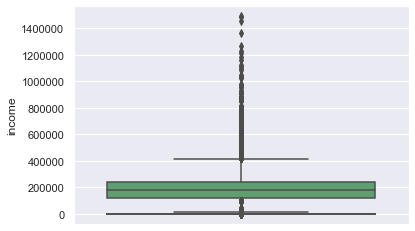

In [259]:
# visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

sns.set(color_codes=True)
colors = ["y", "b", "g", "r"]

cols = list(income.columns.values)

if not os.path.exists("plots/univariate/box"):
    os.makedirs("plots/univariate/box")

# draw a boxplot with vertical orientation
for i, col in enumerate(cols):
	sns.boxplot(income[col], color=random.choice(colors), orient="v")

In [260]:
# saving the boxplot with vertical orientation
for i, col in enumerate(cols):
    sns.boxplot(income[col], color=random.choice(colors), orient="v")
    plt.savefig("plots/univariate/box/box_" + str(i) + ".png")
    plt.clf()
    plt.close()

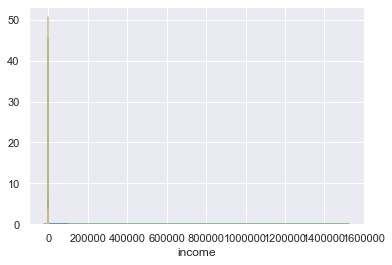

In [261]:
#DISTPLOT
if not os.path.exists("plots/univariate/density"):
    os.makedirs("plots/univariate/density")

# draw a histogram and fit a kernel density estimate (KDE)
for i, col in enumerate(cols):
    sns.distplot(income[col], color=random.choice(colors))

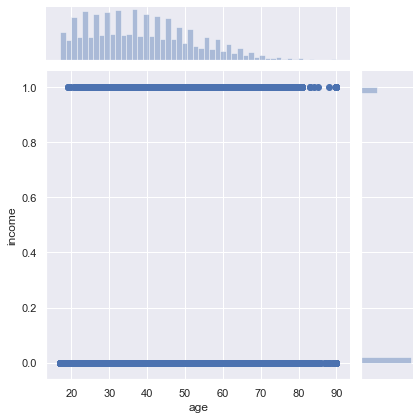

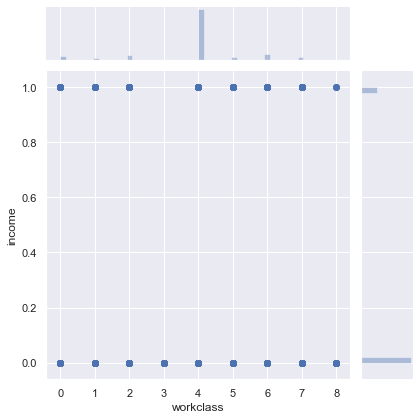

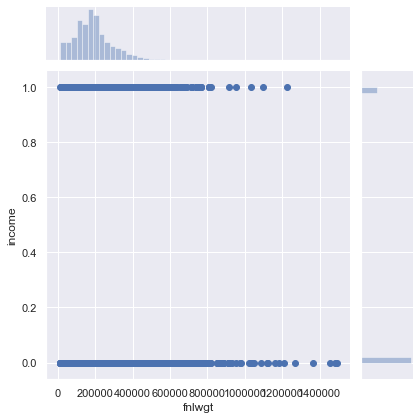

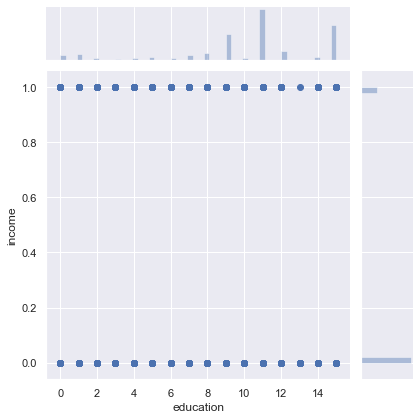

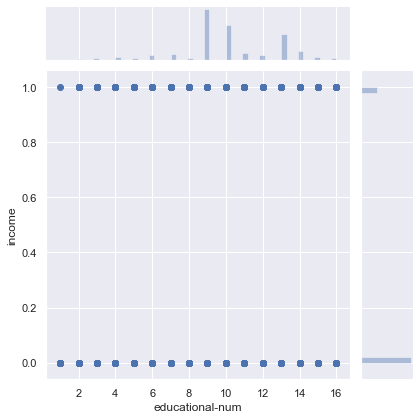

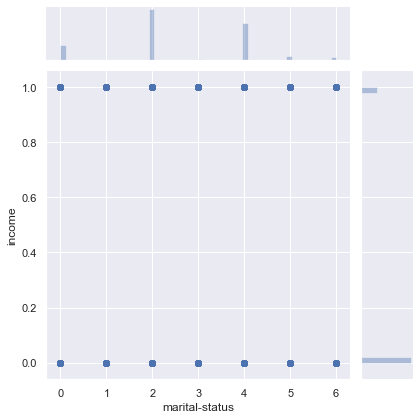

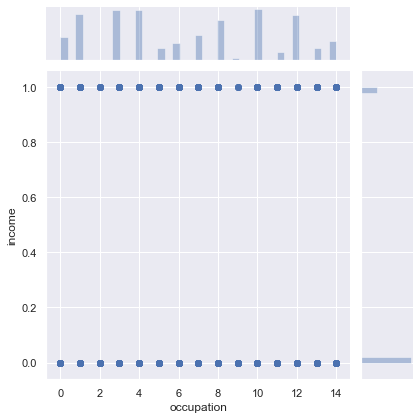

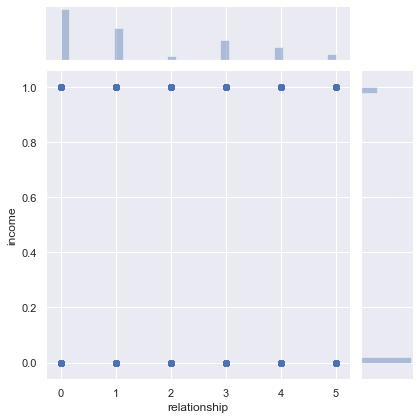

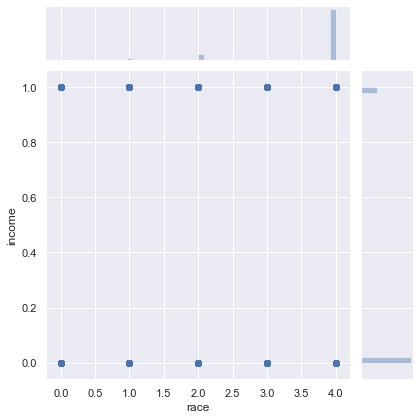

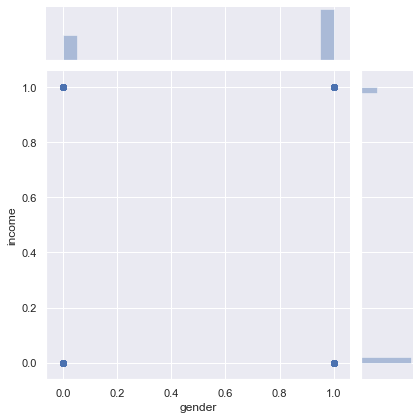

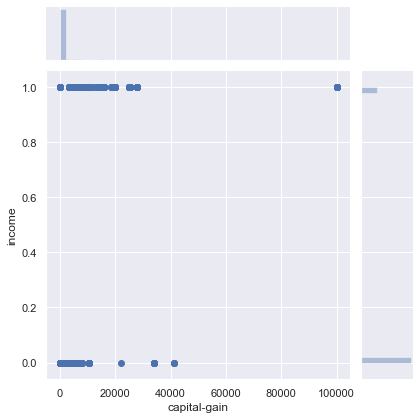

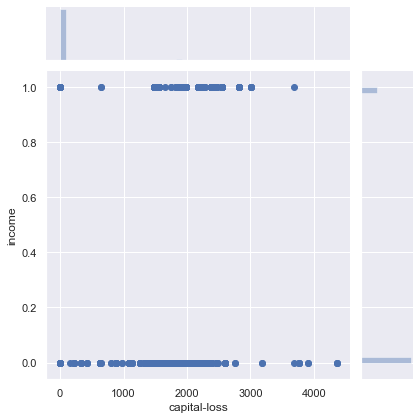

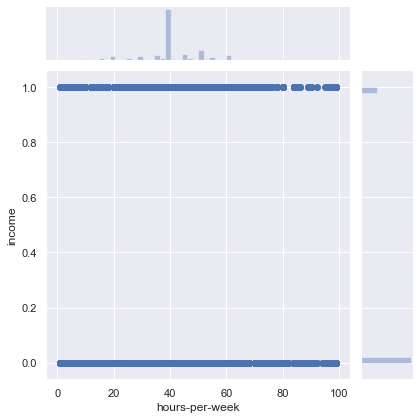

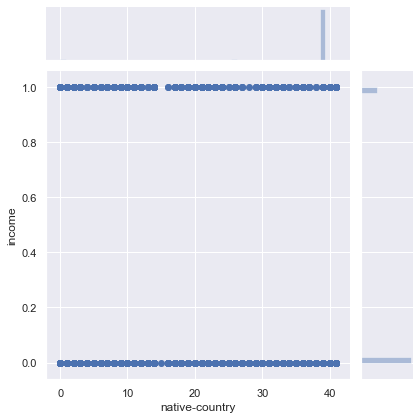

In [262]:
# JOINTPLOT
if not os.path.exists("plots/multivariate"):
    os.makedirs("plots/multivariate")

# bivariate plot between target and reason of absence
for i, col in enumerate(cols):
    if (i == len(cols) - 1):
        pass
    else: 
        sns.jointplot(x=col, y="income", data=income)
    if (i == len(cols) - 1):
        pass
    else: 
        sns.jointplot(x=col, y="income", data=income)
        plt.savefig("plots/multivariate/target_vs_" + str(i) + ".png")
        plt.clf()
        plt.close()

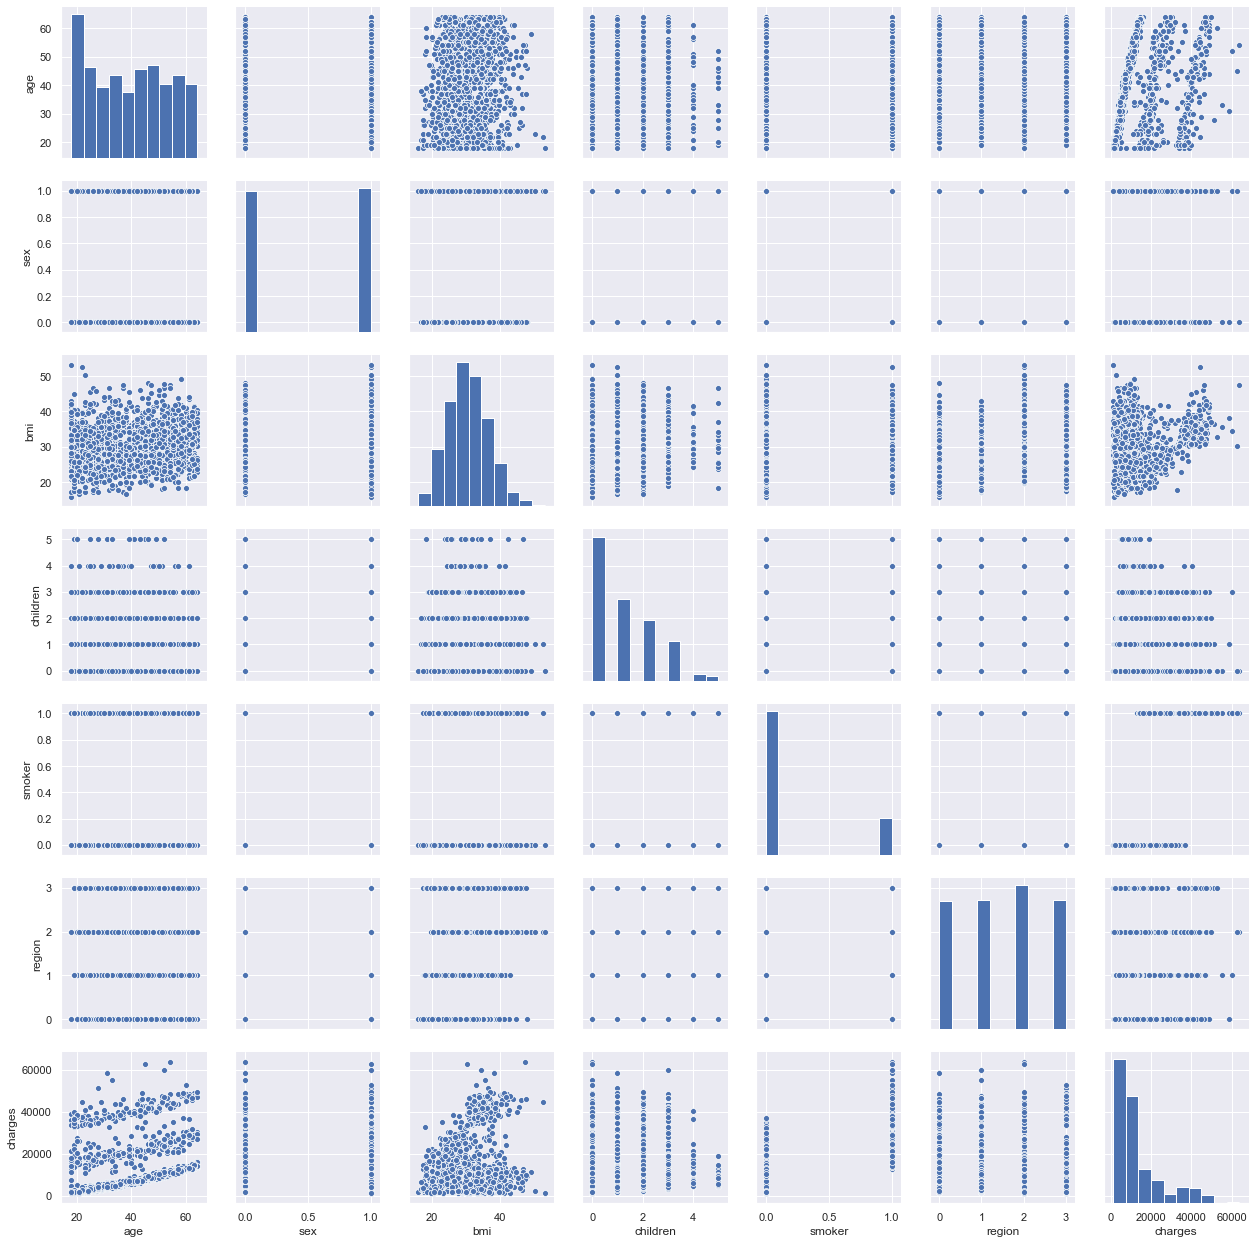

In [263]:
# PAIRPLOT
sns.pairplot(cost)
plt.show()
plt.savefig("plots/pairplot.png")
plt.clf()
plt.close()

## MODEL 4

(48842, 14)
(48842,)
(39073, 14)
(9769, 14)
(39073,)
(9769,)
Linear: -0.135, 0.003
Lasso: -0.182, 0.003
ElasticNet: -0.182, 0.003
KNN: -0.126, 0.004
DecisionTree: -0.185, 0.007


C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

SVR: -0.129, 0.004
AdaBoost: -0.121, 0.003
GradientBoost: -0.095, 0.002


C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

RandomForest: -0.109, 0.003


C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

ExtraTrees: -0.118, 0.003


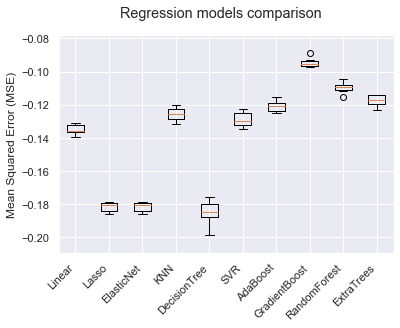

In [264]:
X = income.drop("income", axis=1)
Y = income["income"]
print(X.shape)
print(Y.shape)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)
from sklearn.model_selection import train_test_split

seed      = 9
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# user variables to tune
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()
# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.show()
plt.savefig("model_mse_scores.png")
plt.clf()
plt.close()

In [265]:
# create and fit the best regression model
best_model = GradientBoostingRegressor(random_state=seed)
#best_model = LinearRegression()
#best_model = KNeighborsRegressor()
best_model.fit(X_train, Y_train)

# make predictions using the model
predictions = best_model.predict(X_test)
print("[INFO] MSE : {}".format(round(mean_squared_error(Y_test, predictions), 3)))

[INFO] MSE : 0.096


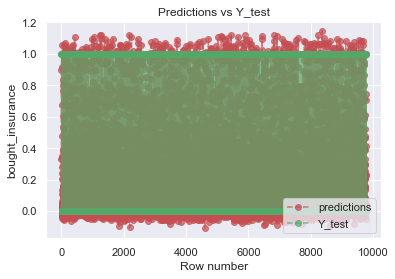

In [266]:
# plot between predictions and Y_test
import numpy as np
x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, predictions, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('income')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')
plt.show()
plt.savefig("predictions_vs_ytest.png")
plt.clf()
plt.close()

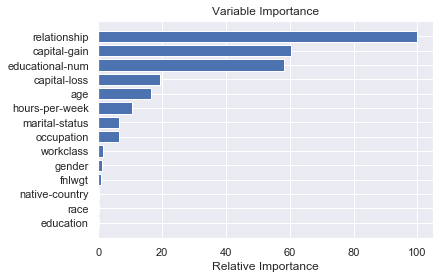

In [267]:
# plot model's feature importance
feature_importance = best_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, income.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
plt.savefig("feature_importance.png")
plt.clf()
plt.close()

## Challenge 5

In [268]:
# Question
# ---
# Given the following dataset create a model to predict the maximum temperature.
# ---
# Dataset url = http://bit.ly/WeatherDataset
# ---
# 
weather = pd.read_csv("http://bit.ly/WeatherDataset")
weather

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0       8.00    24.30      0.00         3.40      6.30          NW   
1      14.00    26.90      3.60         4.40      9.70         ENE   
2      13.70    23.40      3.60         5.80      3.30          NW   
3      13.30    15.50     39.80         7.20      9.10          NW   
4       7.60    16.10      2.80         5.60     10.60         SSE   
..       ...      ...       ...          ...       ...         ...   
361     9.00    30.70      0.00         7.60     12.10         NNW   
362     7.10    28.40      0.00        11.60     12.70           N   
363    12.50    19.90      0.00         8.40      5.30         ESE   
364    12.50    26.90      0.00         5.00      7.10          NW   
365    12.30    30.20      0.00         6.00     12.60          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0            30.00         SW         NW          6.00  ...           29   
1            39.00          E          W          4.00  ...           36   
2            85.00          N        NNE          6.00  ...           69   
3            54.00        WNW          W         30.00  ...           56   
4            50.00        SSE        ESE         20.00  ...           49   
..             ...        ...        ...           ...  ...          ...   
361          76.00        SSE         NW          7.00  ...           15   
362          48.00        NNW        NNW          2.00  ...           22   
363          43.00        ENE        ENE         11.00  ...           47   
364          46.00        SSW        WNW          6.00  ...           39   
365          78.00         NW        WNW         31.00  ...           13   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0       1,019.70     1,015.00         7         7    14.40    23.60   
1       1,012.40     1,008.40         5         3    17.50    25.70   
2       1,009.50     1,007.20         8         7    15.40    20.20   
3       1,005.50     1,007.00         2         7    13.50    14.10   
4       1,018.30     1,018.50         7         7    11.10    15.40   
..           ...          ...       ...       ...      ...      ...   
361     1,016.10     1,010.80         1         3    20.40    30.00   
362     1,020.00     1,016.90         0         1    17.20    28.20   
363     1,024.00     1,022.80         3         2    14.50    18.30   
364     1,021.00     1,016.20         6         7    15.80    25.90   
365     1,009.60     1,009.20         1         1    23.80    28.60   

     RainToday  RISK_MM RainTomorrow  
0           No     3.60          Yes  
1          Yes     3.60          Yes  
2          Yes    39.80          Yes  
3          Yes     2.80          Yes  
4          Yes     0.00           No  
..         ...      ...          ...  
361         No     0.00           No  
362         No     0.00           No  
363         No     0.00           No  
364         No     0.00           No  
365         No     0.00           No  

[366 rows x 22 columns]

In [269]:
weather.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [270]:
weather=weather.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], axis=1)

In [271]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
# Categorical boolean mask
categorical_feature_mask = weather.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_features = weather.columns[categorical_feature_mask].tolist()
categorical_features

[]

In [272]:
#initializing the label encoder
le = LabelEncoder()
# Converting the variables to numerical
for i in range(0):
    new = le.fit_transform(weather[categorical_features[i]])
    weather[categorical_features[i]] = new
weather.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     8.00    24.30      0.00         3.40      6.30          30.00   
1    14.00    26.90      3.60         4.40      9.70          39.00   
2    13.70    23.40      3.60         5.80      3.30          85.00   
3    13.30    15.50     39.80         7.20      9.10          54.00   
4     7.60    16.10      2.80         5.60     10.60          50.00   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          6.00            20           68           29     1,019.70   
1          4.00            17           80           36     1,012.40   
2          6.00             6           82           69     1,009.50   
3         30.00            24           62           56     1,005.50   
4         20.00            28           68           49     1,018.30   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  
0     1,015.00         7         7    14.40    23.60     3.60  
1     1,008.40         5         3    17.50    25.70     3.60  
2     1,007.20         8         7    15.40    20.20    39.80  
3     1,007.00         2         7    13.50    14.10     2.80  
4     1,018.50         7         7    11.10    15.40     0.00

In [273]:
import seaborn as sns
# correlation between attributes
print("PEARSON CORRELATION")
print(weather.corr(method="pearson"))
sns.heatmap(weather.corr(method="pearson"))
plt.savefig("heatmap_pearson_weather.png")
plt.clf()
plt.close()

print("SPEARMAN CORRELATION")
print(weather.corr(method="spearman"))
sns.heatmap(weather.corr(method="spearman"))
plt.savefig("heatmap_pearson_weather.png")
plt.clf()
plt.close()

print("KENDALL CORRELATION")
print(weather.corr(method="kendall"))
sns.heatmap(weather.corr(method="kendall"))
plt.savefig("heatmap_pearson_weather.png")
plt.clf()
plt.close()

PEARSON CORRELATION
               MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp           1.00     0.75      0.20         0.65      0.04   
MaxTemp           0.75     1.00     -0.07         0.69      0.45   
Rainfall          0.20    -0.07      1.00        -0.01     -0.15   
Evaporation       0.65     0.69     -0.01         1.00      0.32   
Sunshine          0.04     0.45     -0.15         0.32      1.00   
WindGustSpeed     0.22     0.11      0.10         0.29      0.10   
WindSpeed9am      0.13    -0.22      0.22         0.07     -0.06   
WindSpeed3pm     -0.07    -0.17      0.06         0.05      0.07   
Humidity9am      -0.21    -0.36      0.15        -0.52     -0.50   
Humidity3pm      -0.04    -0.53      0.29        -0.39     -0.76   
Pressure9am      -0.50    -0.29     -0.33        -0.38      0.01   
Pressure3pm      -0.50    -0.38     -0.25        -0.39     -0.04   
Cloud9am          0.22    -0.18      0.18        -0.11     -0.68   
Cloud3pm          0.12    -0

KENDALL CORRELATION
               MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp           1.00     0.55      0.16         0.47      0.07   
MaxTemp           0.55     1.00     -0.09         0.52      0.33   
Rainfall          0.16    -0.09      1.00        -0.08     -0.18   
Evaporation       0.47     0.52     -0.08         1.00      0.29   
Sunshine          0.07     0.33     -0.18         0.29      1.00   
WindGustSpeed     0.16     0.09      0.12         0.23      0.07   
WindSpeed9am      0.13    -0.11      0.18         0.08     -0.06   
WindSpeed3pm     -0.05    -0.14      0.08         0.03      0.02   
Humidity9am      -0.15    -0.23      0.18        -0.39     -0.37   
Humidity3pm      -0.05    -0.39      0.30        -0.32     -0.55   
Pressure9am      -0.34    -0.21     -0.28        -0.28     -0.02   
Pressure3pm      -0.34    -0.26     -0.22        -0.29     -0.05   
Cloud9am          0.16    -0.12      0.25        -0.10     -0.55   
Cloud3pm          0.10    -0

In [274]:
#checkinh missing values
print(weather.isna().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         3
WindGustSpeed    2
WindSpeed9am     7
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64


In [275]:
weather=weather.drop(['Sunshine','WindGustSpeed','WindSpeed9am'],axis=1)

In [276]:
#checkinh missing values
print(weather.isna().sum())

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RISK_MM         0
dtype: int64


In [277]:
file_report = "weather.txt"
with open(file_report, "w") as f:
    f.write("Features shape : {}".format(weather.drop("MaxTemp", axis=1).shape))
    f.write("\n")

    f.write("Target shape   : {}".format(weather["MaxTemp"].shape))
    f.write("\n")

    f.write("\nColumn names")
    f.write("\n")
    f.write(str(weather.columns))
    f.write("\n")

    f.write("\nStatistical summary")
    f.write("\n")
    f.write(str(weather.describe()))
    f.write("\n")

    f.write("\nDatatypes")
    f.write("\n")
    f.write(str(weather.dtypes))
    f.write("\n")

    f.write("\nPEARSON correlation")
    f.write("\n")
    f.write(str(weather.corr(method="pearson")))
    f.write("\n")

    f.write("\nSPEARMAN correlation")
    f.write("\n")
    f.write(str(weather.corr(method="spearman")))
    f.write("\n")

    f.write("\nKENDALL correlation")
    f.write("\n")
    f.write(str(weather.corr(method="kendall")))
   
   #f.write("\nMissing Values")
   #f.write("\n")
   #f.write(str(disease.isnull(insurance))

VISUALIZATION

In [278]:
# visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

sns.set(color_codes=True)
colors = ["y", "b", "g", "r"]

cols = list(weather.columns.values)

if not os.path.exists("plots/univariate/box"):
    os.makedirs("plots/univariate/box")

# draw a boxplot with vertical orientation
for i, col in enumerate(cols):
    sns.boxplot(weather[col], color=random.choice(colors), orient="v")
    plt.savefig("plots/univariate/box/box_" + str(i) + ".png")
    plt.clf()
    plt.close()

In [279]:
#DISTPLOT
if not os.path.exists("plots/univariate/density"):
    os.makedirs("plots/univariate/density")

# draw a histogram and fit a kernel density estimate (KDE)
for i, col in enumerate(cols):
    sns.distplot(weather[col], color=random.choice(colors))
    plt.savefig("plots/univariate/density/density_" + str(i) + ".png")
    plt.clf()
    plt.close()

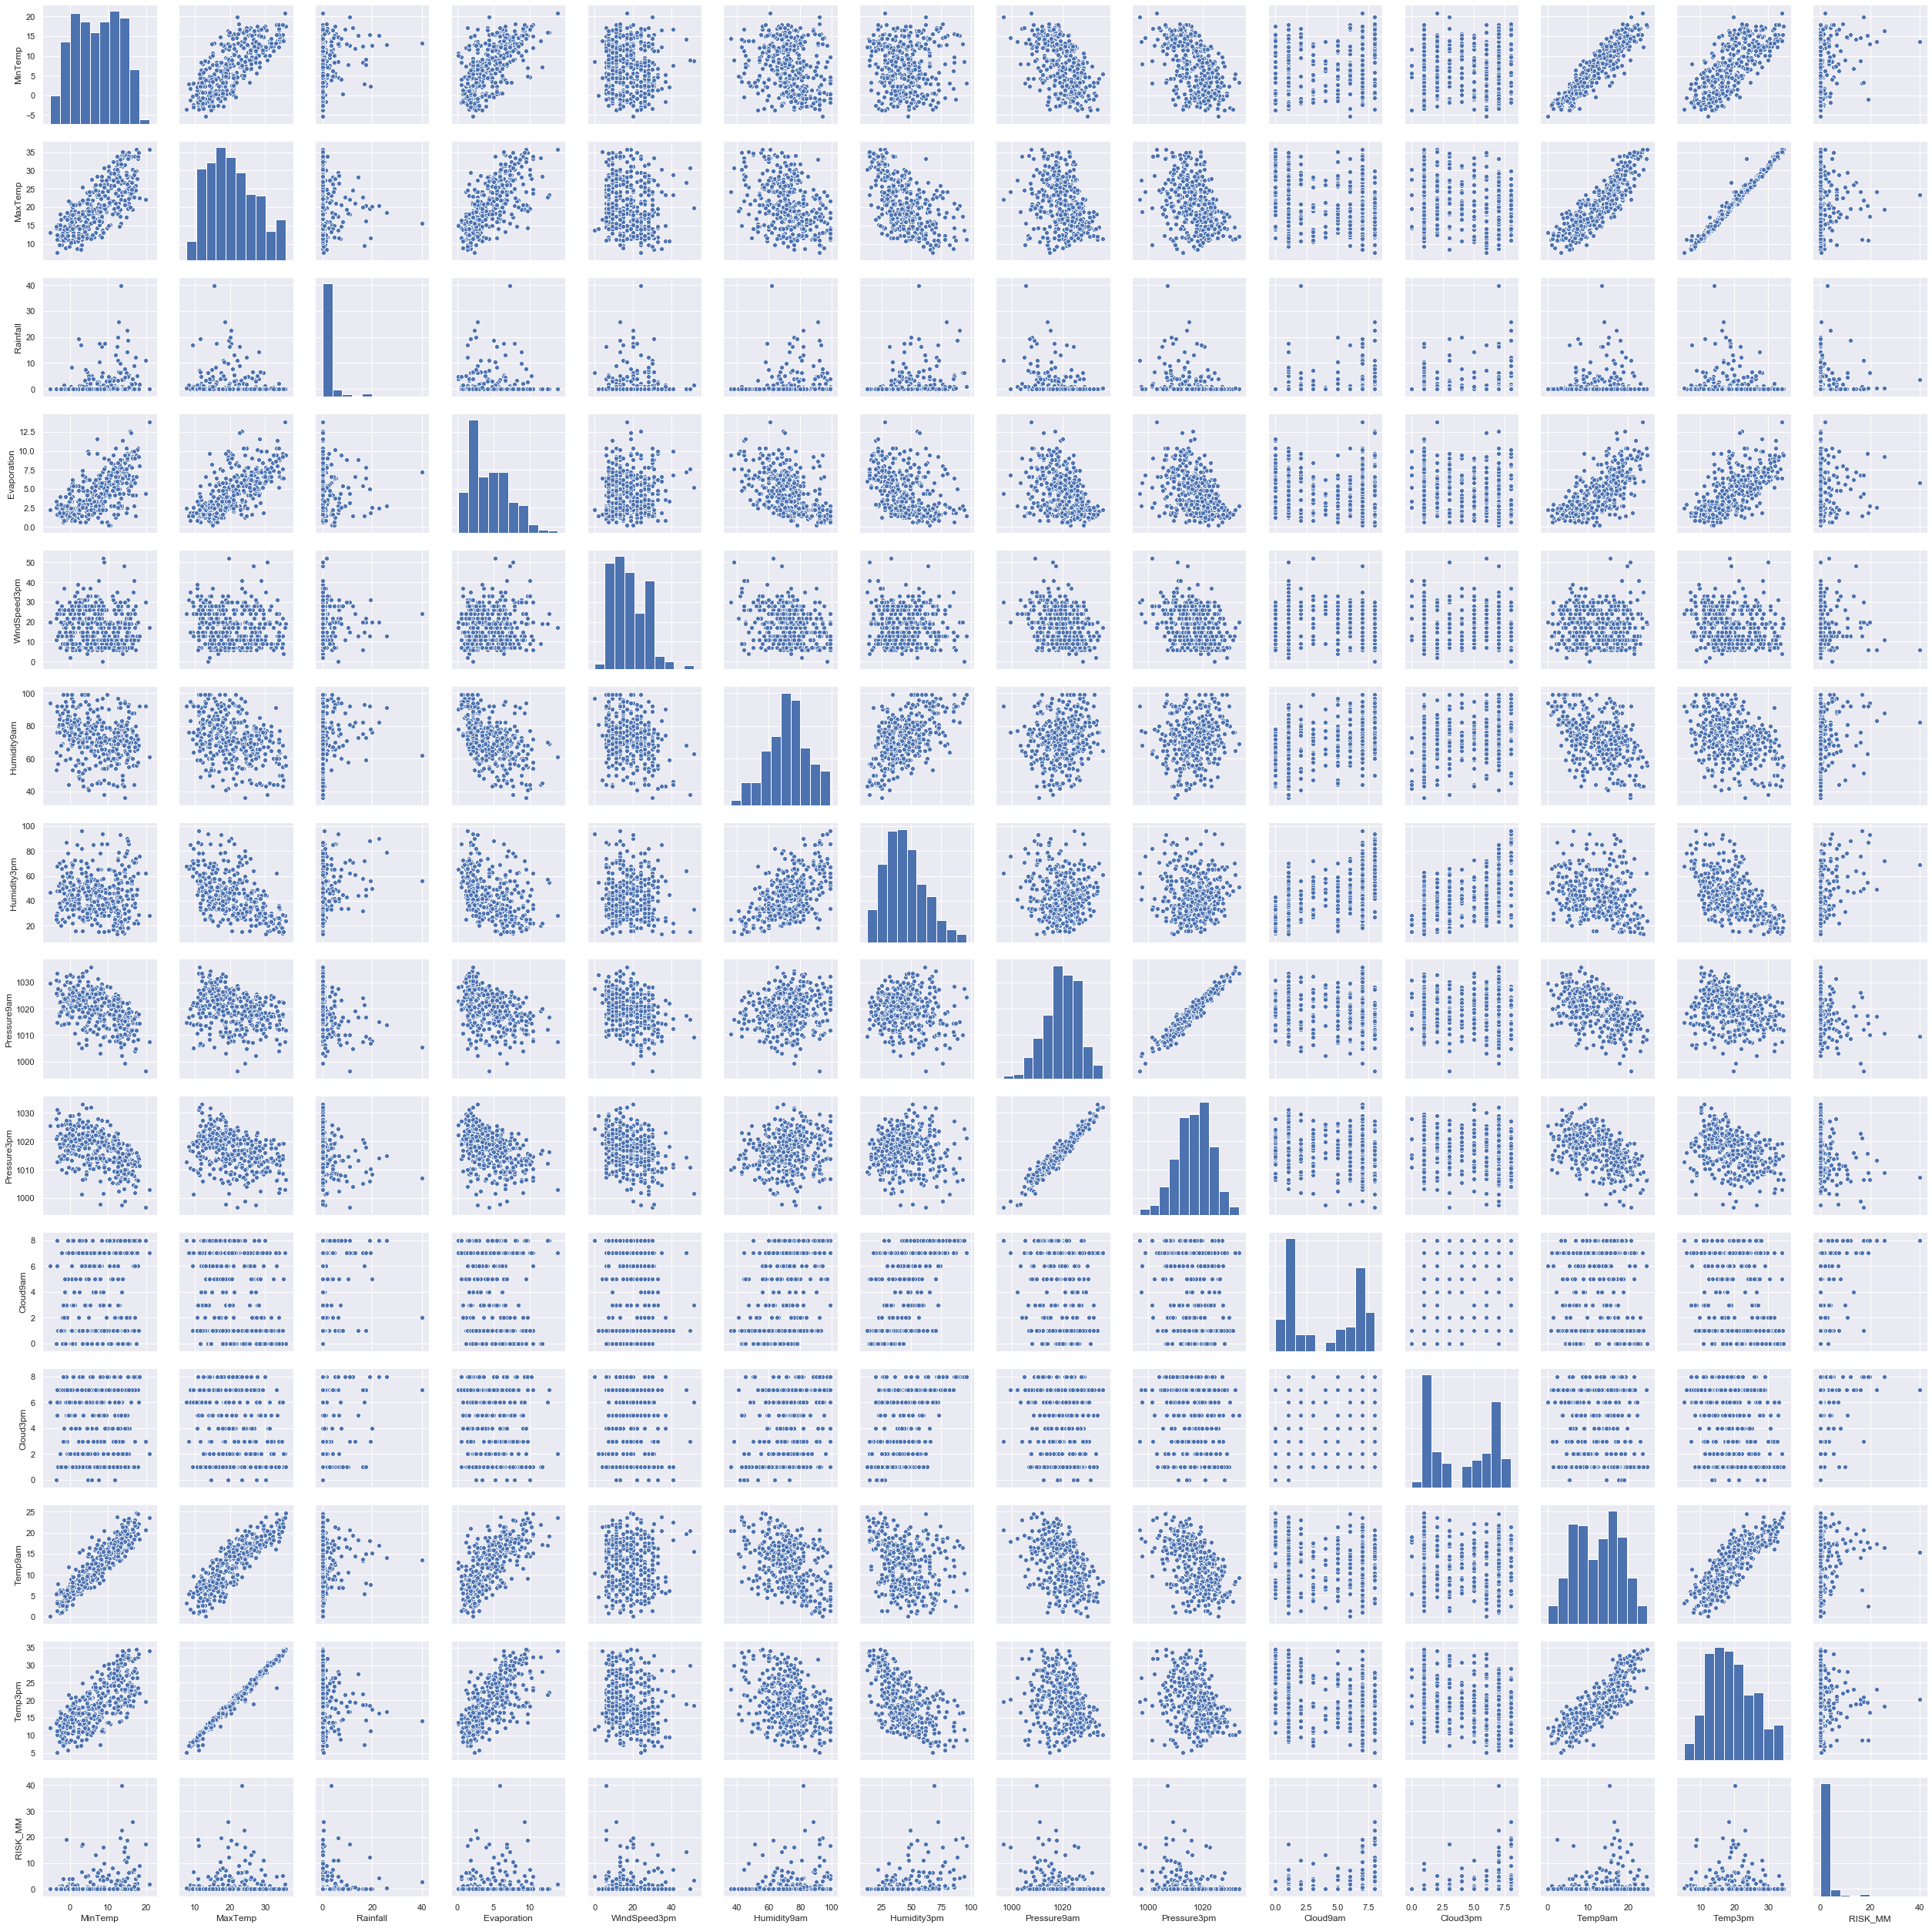

In [280]:
# PAIRPLOT
sns.pairplot(weather)
plt.show()
plt.savefig("plots/pairplot.png")
plt.clf()
plt.close()

## MODEL 5

In [281]:
#SPLITTING DATA
X = weather.drop("MaxTemp", axis=1)
Y = weather["MaxTemp"]
print(X.shape)
print(Y.shape)

(366, 13)
(366,)


In [282]:
#SCALLING DATA

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

In [283]:
#TRAINING SET AND VALIDATION SET
from sklearn.model_selection import train_test_split
seed      = 9
test_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(292, 13)
(74, 13)
(292,)
(74,)


In [284]:
#SELECTING MODELS

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# user variables to tune
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

Linear: -0.829, 0.551
Lasso: -22.121, 5.381
ElasticNet: -33.817, 8.021
KNN: -4.479, 1.086
DecisionTree: -1.528, 0.835
SVR: -10.741, 2.671

C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 


AdaBoost: -1.437, 0.724
GradientBoost: -0.995, 0.763
RandomForest: -1.055, 0.789


C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

ExtraTrees: -0.953, 0.734


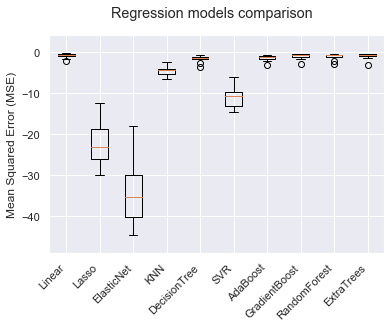

In [285]:
#TRAINING AND VALIDATION
# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.show()
plt.savefig("model_mse_scores.png")
plt.clf()
plt.close()

In [286]:
# create and fit the best regression model
best_model = GradientBoostingRegressor(random_state=seed)
#best_model = LinearRegression()
#best_model = KNeighborsRegressor()
best_model.fit(X_train, Y_train)
# make predictions using the model
predictions = best_model.predict(X_test)
print("[INFO] MSE : {}".format(round(mean_squared_error(Y_test, predictions), 3)))

[INFO] MSE : 0.707


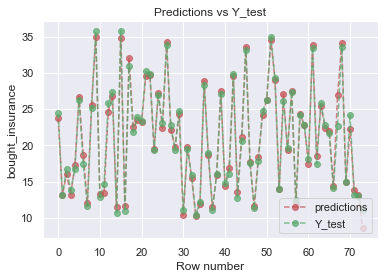

In [287]:
#VISUALIZING PREDICTION
# plot between predictions and Y_test
import numpy as np
x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, predictions, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('MaxTemp')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')
plt.show()
plt.savefig("predictions_vs_ytest.png")
plt.clf()
plt.close()


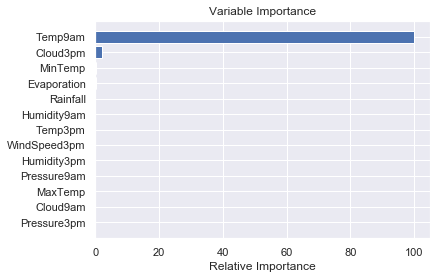

In [288]:
# plot model's feature importance
feature_importance = best_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, weather.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
plt.savefig("feature_importance.png")
plt.clf()
plt.close()